<a href="https://colab.research.google.com/github/Interaverse/Forecasting-monthly-copper-prices/blob/main/GradientBoostingRegressor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import TimeSeriesSplit
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

import matplotlib.pyplot as plt

In [ ]:
# Load the datasets
train_data = pd.read_excel('training_data-11.xlsx')
test_data = pd.read_excel('testing_data-11.xlsx')

#'Copper_Price' as target variable
train_scaled = train_data['Price_Copper'].values.reshape(-1,1)
test_scaled = test_data['Price_Copper'].values.reshape(-1,1)

In [ ]:
#This function is optional, but it improves performance
def create_dataset(dataset, time_step=10):
    dataX, dataY = [], []
    for i in range(len(dataset) - time_step - 1):
        a = dataset[i:(i + time_step), 0]  # Extracting time_step consecutive elements
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])  # Corresponding future value as label
    return np.array(dataX), np.array(dataY)

# Initilize time step
time_step = 10
X_train, y_train = create_dataset(train_scaled, time_step)
X_test, y_test = create_dataset(test_scaled, time_step)


In [ ]:
# Build the Random Forest Regressor Model
model = GradientBoostingRegressor(n_estimators=100, max_depth=10, min_samples_split=5, random_state=42)

# Train the Random Forest Regressor Model
model.fit(X_train, y_train.ravel())


GradientBoostingRegressor(max_depth=10, min_samples_split=5, random_state=42)

In [ ]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score


# Generate predictions for both the training and testing datasets
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

# Calculate RMSE performance metrics
train_rmse = np.sqrt(mean_squared_error(y_train, train_predict))
test_rmse = np.sqrt(mean_squared_error(y_test, test_predict))
print(f'Train RMSE: {train_rmse:.2f} ')
print(f'Test RMSE: {test_rmse:.2f} ')
print('----------------')

# Calculate MSE performance metrics
train_mse = mean_squared_error(y_train, train_predict)
test_mse = mean_squared_error(y_test, test_predict)
print(f'Train MSE: {train_mse:.2f} ')
print(f'Test MSE: {test_mse:.2f} ')
print('----------------')

# Calculate MAE performance metrics
train_mae = mean_absolute_error(y_train, train_predict)
test_mae = mean_absolute_error(y_test, test_predict)
print(f'Train MAE: {train_mae:.2f} ')
print(f'Test MAE: {test_mae:.2f} ')
print('----------------')

# Calculate r2 performance metrics
train_r2 = r2_score(y_train, train_predict)
test_r2 = r2_score(y_test, test_predict)
print(f'Train R2: {train_r2:.2f} ')
print(f'Test R2: {test_r2:.2f}' )


Train RMSE: 0.00 
Test RMSE: 0.15 
----------------
Train MSE: 0.00 
Test MSE: 0.02 
----------------
Train MAE: 0.00 
Test MAE: 0.12 
----------------
Train R2: 1.00 
Test R2: 0.82


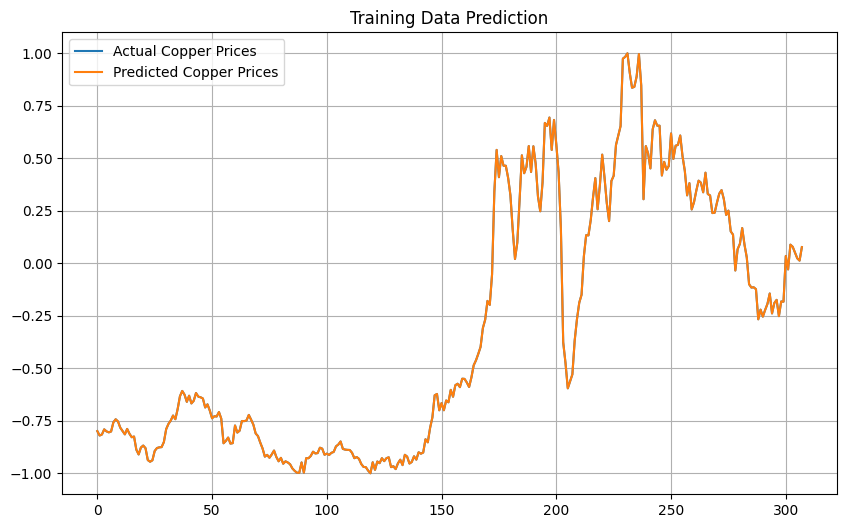

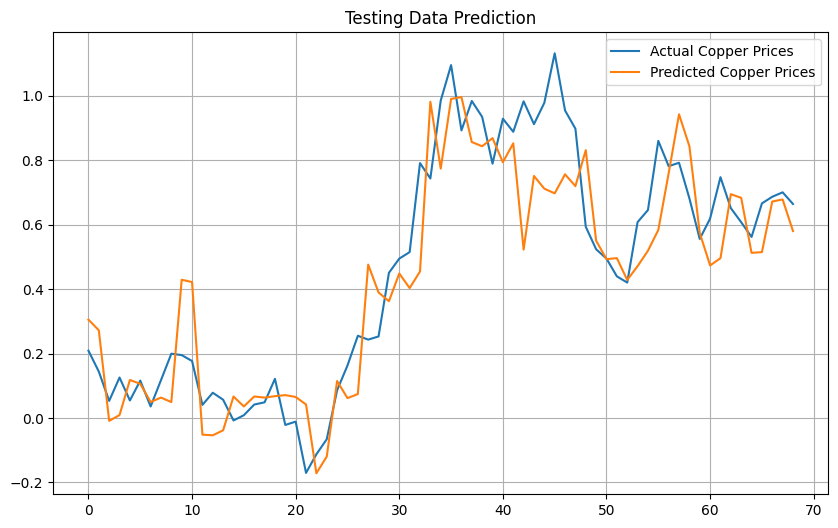

In [ ]:
# Plotting the actual vs predicted copper prices for training data
plt.figure(figsize=(10, 6))
plt.plot(y_train, label='Actual Copper Prices')
plt.plot(train_predict, label='Predicted Copper Prices')
plt.title('Training Data Prediction')
plt.legend()
plt.grid(True)
plt.show()


# Plotting the actual vs predicted copper prices for testing data
plt.figure(figsize=(10, 6))
plt.plot(y_test, label='Actual Copper Prices')
plt.plot(test_predict, label='Predicted Copper Prices')
plt.title('Testing Data Prediction')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
!pip install deap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.4/135.4 kB 4.0 MB/s eta 0:00:00


In [ ]:
import numpy as np
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
from deap import base, creator, tools, algorithms
import random

def evaluate_individual(individual):
    # Unpack individual's parameters
    n_estimators, max_depth, min_samples_split = individual

    # Create the Random Forest Regressor model with the selected parameters
    model = GradientBoostingRegressor(n_estimators=n_estimators,
                                   max_depth=max_depth,
                                   min_samples_split=min_samples_split,
                                   random_state=42)

    model.fit(X_train, y_train.ravel())  # Ensure X_train and y_train are defined
    predictions = model.predict(X_test)  # Ensure X_test and y_test are defined
    mse = mean_squared_error(y_test, predictions)
    rmse = np.sqrt(mse)  # Calculate RMSE from MSE
    return (mse,rmse)

# Genetic operator
def mutate_individual(individual):
    if random.random() < 0.2:  # Mutation probability
        # Choose a random parameter to mutate
        param_to_mutate = random.randint(0, len(individual) - 1)

        # Mutate the chosen parameter
        if param_to_mutate == 0:
            individual[param_to_mutate] = random.randint(10, 100)  # Mutate n_estimators
        elif param_to_mutate == 1:
            individual[param_to_mutate] = random.randint(1, 20)  # Mutate max_depth
        elif param_to_mutate == 2:
            individual[param_to_mutate] = random.randint(2, 20)  # Mutate min_samples_split
    return individual,

def crossover_individual(ind1, ind2):
    # Crossover for each parameter in the individual
    for i in range(len(ind1)):
        if random.random() < 0.5:
            ind1[i], ind2[i] = ind2[i], ind1[i]
    return ind1, ind2

# DEAP setup
creator.create("FitnessMin", base.Fitness, weights=(-1.0, -1.0))
creator.create("Individual", list, fitness=creator.FitnessMin)

toolbox = base.Toolbox()
toolbox.register("n_estimators", random.randint, 10, 100)
toolbox.register("max_depth", random.randint, 1, 20)
toolbox.register("min_samples_split", random.randint, 2, 20)
toolbox.register("individual", tools.initCycle, creator.Individual,
                 (toolbox.n_estimators, toolbox.max_depth, toolbox.min_samples_split),
                 n=1)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)
toolbox.register("evaluate", evaluate_individual)
toolbox.register("mate", crossover_individual)
toolbox.register("mutate", mutate_individual)
toolbox.register("select", tools.selTournament, tournsize=3)

population = toolbox.population(n=50)

def print_best_of_generation(gen, pop):
    best_individual = min(pop, key=lambda ind: ind.fitness.values[0])
    print(f"Generation: {gen}")
    print(f"  Best Parameters: {best_individual}, MSE: {best_individual.fitness.values[0]}, RMSE: {best_individual.fitness.values[1]}")

# Custom loop for the genetic algorithm to print best individual per generation
ngen = 10
for gen in range(ngen):
    offspring = algorithms.varAnd(population, toolbox, cxpb=0.5, mutpb=0.2)
    fits = toolbox.map(toolbox.evaluate, offspring)
    for fit, ind in zip(fits, offspring):
        ind.fitness.values = fit
    population = toolbox.select(offspring, k=len(population))
    print_best_of_generation(gen, population)

best_individual = tools.selBest(population, k=1)[0]
print("Best individual found:")
print(f"  Parameters: {best_individual}")
print(f"  MSE: {best_individual.fitness.values[0]}, RMSE: {best_individual.fitness.values[1]}")



/usr/local/lib/python3.10/dist-packages/deap/creator.py:185: RuntimeWarning: A class named 'FitnessMin' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
/usr/local/lib/python3.10/dist-packages/deap/creator.py:185: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "


Generation: 0
  Best Parameters: [60, 20, 17], MSE: 0.016259637754962242, RMSE: 0.12751328462149442
Generation: 1
  Best Parameters: [76, 15, 17], MSE: 0.01624244764401332, RMSE: 0.12744586161980043
Generation: 2
  Best Parameters: [69, 15, 17], MSE: 0.016258094080814675, RMSE: 0.12750723148439336
Generation: 3
  Best Parameters: [69, 20, 17], MSE: 0.016215376049149282, RMSE: 0.12733960911338343
Generation: 4
  Best Parameters: [69, 20, 17], MSE: 0.016215376049149282, RMSE: 0.12733960911338343
Generation: 5
  Best Parameters: [69, 20, 17], MSE: 0.016215376049149282, RMSE: 0.12733960911338343
Generation: 6
  Best Parameters: [69, 20, 17], MSE: 0.016215376049149282, RMSE: 0.12733960911338343
Generation: 7
  Best Parameters: [69, 20, 17], MSE: 0.016215376049149282, RMSE: 0.12733960911338343
Generation: 8
  Best Parameters: [69, 20, 17], MSE: 0.016215376049149282, RMSE: 0.12733960911338343
Generation: 9
  Best Parameters: [69, 20, 17], MSE: 0.016215376049149282, RMSE: 0.12733960911338343
B

In [ ]:
from sklearn.model_selection import TimeSeriesSplit, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import GradientBoostingRegressor
import numpy as np

# Prepare the time series cross-validator
tscv = TimeSeriesSplit(n_splits=10)

# Create a model
model = GradientBoostingRegressor()

param_grid = {
    'n_estimators': [49],  # You can adjust these values based on your DEAP optimization results
    'max_depth': [2],             # You can adjust these values based on your DEAP optimization results
    'min_samples_split': [4]     # You can adjust these values based on your DEAP optimization results
}

# Setup GridSearchCV to find the best parameters
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=tscv, scoring='neg_mean_squared_error', verbose=1)
grid_search.fit(X_train, y_train)

# Output the best parameters and the corresponding RMSE for the best model
best_params = grid_search.best_params_
best_cv_score = np.sqrt(-grid_search.best_score_)
print(f"Best parameters: {best_params}")
print(f"Best cross-validation RMSE: {best_cv_score}")


# Now using the best estimator to make predictions on each fold
best_model = grid_search.best_estimator_

# Now using the best estimator to make predictions on each fold
best_model = grid_search.best_estimator_
for train_index, test_index in tscv.split(X_train):
    X_train_fold, X_test_fold = X_train[train_index], X_train[test_index]
    y_train_fold, y_test_fold = y_train[train_index], y_train[test_index]

    # Fit the model
    best_model.fit(X_train_fold, y_train_fold)

    # No need to fit again, directly predict using the best model
    predictions = best_model.predict(X_test_fold)

    # Calculate RMSE for this fold
    fold_rmse = np.sqrt(mean_squared_error(y_test_fold, predictions))
    print(" RMSE: ", fold_rmse)

# Evaluate the best model on the test set
y_predgrid = best_model.predict(X_test)
best_rmse = np.sqrt(mean_squared_error(y_test, y_predgrid))
best_mse = mean_squared_error(y_test, y_predgrid)
best_mae = mean_absolute_error(y_test, y_predgrid)
best_r2 = r2_score(y_test, y_predgrid)

# Printing Model Evaluation
#print(f"Best RMSE Score: {test_rmse:.4f}")
print(f"Best MSE Score: {test_mse:.4f}")
print(f"Best MAE Score: {test_mae:.4f}")
print(f"Best R^2 Score: {test_r2:.4f}")



Fitting 10 folds for each of 1 candidates, totalling 10 fits
Best parameters: {'max_depth': 2, 'min_samples_split': 4, 'n_estimators': 49}
Best cross-validation RMSE: 0.2930073262704816
 RMSE:  0.11266639172314873
 RMSE:  0.03587978050818289
 RMSE:  0.03725157990903548
 RMSE:  0.023076583386292905
 RMSE:  0.10630000754333052
 RMSE:  0.7683479379407708
 RMSE:  0.239686569608273
 RMSE:  0.3743907172762618
 RMSE:  0.11778912419316348
 RMSE:  0.1247163922393885
Best MSE Score: 0.0238
Best MAE Score: 0.1208
Best R^2 Score: 0.8180


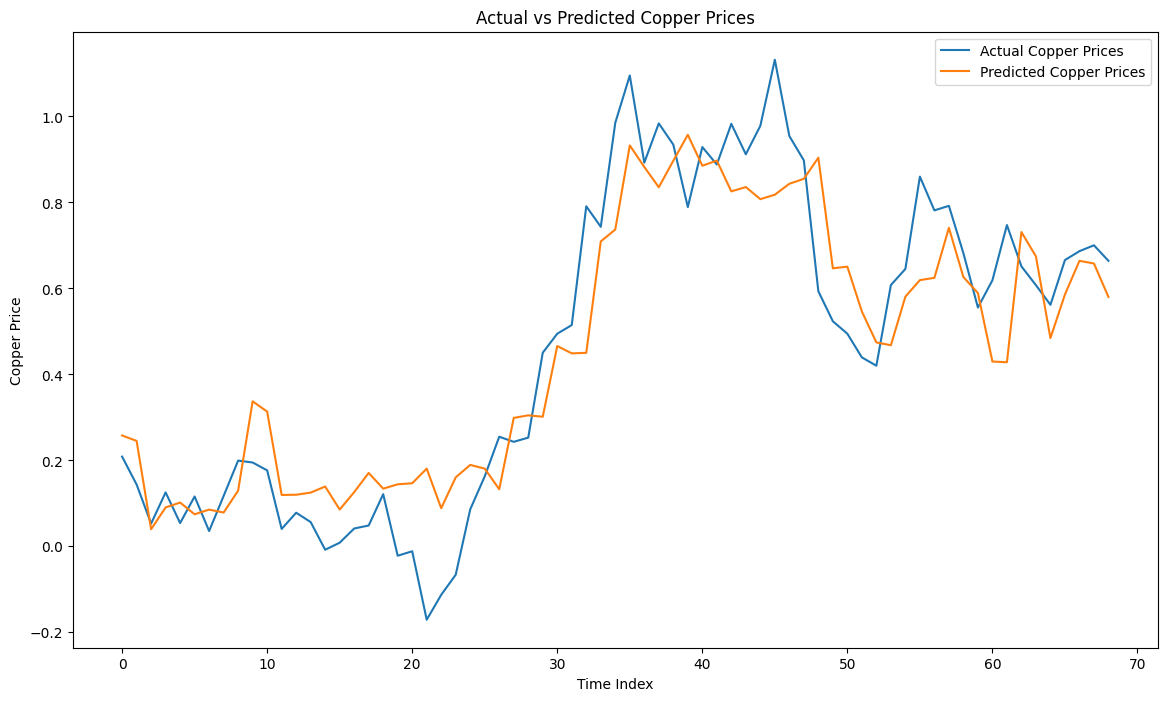

In [ ]:
# Visualize predictions
plt.figure(figsize=(14, 8))
plt.plot(y_test, label = 'Actual Copper Prices')
plt.plot(y_predgrid, label = 'Predicted Copper Prices')
plt.title('Actual vs Predicted Copper Prices')
plt.xlabel('Time Index')
plt.ylabel('Copper Price')
plt.legend()
plt.show()